In [1]:
import pandas as pd

In [2]:
import torch

In [3]:
data = pd.read_csv('all_data.csv')

In [18]:
split_percentage = 80

# Randomly shuffle the DataFrame
df_shuffled = data.sample(frac=1, random_state=42)

# Calculate the split index
split_idx = int(len(df_shuffled) * (split_percentage / 100))

# Split the DataFrame into two
df1 = df_shuffled[:split_idx]
df2 = df_shuffled[split_idx:]



In [21]:
len(df1), len(df2)

(1662, 416)

In [24]:
df1.head()

,Unnamed: 0,id,prompt_id,text,generated,indexes
571,571,cac4272e,1,"Dear Senator [Senator's Last Name],\n\nI am wr...",1,"[28, 1, 162, 183, 8, 1, 1, 4, 1, 3, 1, 1, 1, 8..."
1498,1498,9124e664,1,The Electoral College is a process that has be...,0,"[3, 1312, 1, 1, 1, 1, 3, 2, 4, 1, 2, 4, 12, 1,..."
1342,1342,7611ff17,0,Car usage could easily help detoriate waste an...,0,"[269, 4208, 25, 97, 96, 982, 27, 1, 2294, 4, 1..."
1437,1437,8656ffec,0,"For years, the United States has been mass pro...",0,"[36, 13, 1, 1, 5, 1, 1, 1, 817, 3, 1, 5, 161, ..."
745,745,0a4a6c5b,0,"""All of our development since world war II has...",0,"[53, 48, 2, 3, 238, 60, 209, 1, 1, 1, 1, 38, 2..."


In [4]:
data.head()

,Unnamed: 0,id,prompt_id,text,generated,indexes
0,0,d429f032,0,Advantages of Limiting Car Usage \n\nLimiting ...,1,"[699, 1, 1, 379, 2, 18, 13, 1, 27, 144, 13, 9,..."
1,1,1ce279be,0,Advantages of Limiting Car Usage\n\nLimiting c...,1,"[699, 1, 1, 379, 2, 18, 13, 1, 1, 776, 3, 1, 1..."
2,2,c9595213,0,Limiting car usage has numerous advantages tha...,1,"[2160, 4, 195, 7, 14, 22, 3, 12, 1, 14, 2, 1, ..."
3,3,f2266d87,0,The passages provided discuss the advantages o...,1,"[3, 4400, 3, 49, 101, 1, 33, 2, 436, 1, 83, 3,..."
4,4,eeace4bd,0,Title: The Advantages of Limiting Car Usage\n\...,1,"[191, 1, 1, 574, 1, 1, 338, 1, 16, 13, 1, 1, 9..."


In [5]:
data['generated'].value_counts()

generated
0    1375
1     703
Name: count, dtype: int64

In [28]:
def bin_numbers(nums, max_num, normalize=False):
    """
    Bins a list of integers based on a maximum number. Any integer over the maximum number is binned in the last bin.
    
    Args:
    nums (list): List of integers.
    max_num (int): Maximum number for binning.
    normalize (bool): If True, normalize the bins by dividing by the total number of integers in the list.

    Returns:
    list: Binned and optionally normalized integers.
    """
    nums = [int(x) for x in nums.replace('[',"").replace("]","").split(",")]
    # Create bins for each number up to max_num, plus one extra bin for numbers greater than max_num
    bins = [0] * (max_num )

    # Count the occurrences of each number
    for num in nums:
        if num >= max_num:
            bins[max_num-1] += 1
        else:
            bins[num-1] += 1

    # Normalize if requested
    if normalize:
        total = sum(bins)
        if total > 0:
            bins = [count / total for count in bins]

    return bins

# Example usage
nums = "[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,1,1,1]"
max_num = 10
normalized_bins = bin_numbers(nums, max_num, normalize=True)
normalized_bins

[0.26666666666666666,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.2]

In [7]:
def differences(lst):
    # Check if the list is empty or has only one element
    if len(lst) < 2:
        return []

    # Calculate differences
    diff_list = [lst[i] - lst[i - 1] for i in range(1, len(lst))]
    return diff_list

# Example usage
float_list = [2.5, 3.6, 5.0, 7.2]
diffs = differences(float_list)
print(diffs)

[1.1, 1.4, 2.2]


In [8]:
def interactions(lst):
    products = []
    n = len(lst)

    for i in range(n):
        for j in range(i + 1, n):
            products.append(lst[i] * lst[j])

    return products

In [9]:
interactions(float_list)

[9.0, 12.5, 18.0, 18.0, 25.92, 36.0]

In [29]:

input_data = torch.tensor(data.apply(lambda x: interactions(bin_numbers(x['indexes'], max_num=max_num, normalize=True)), axis = 1))

In [30]:
max_num = 200
data['inputs'] = data.apply(lambda x: interactions(bin_numbers(x['indexes'], max_num=max_num, normalize=True)), axis = 1)

In [31]:
data.head()

,Unnamed: 0,id,prompt_id,text,generated,indexes,inputs
0,0,d429f032,0,Advantages of Limiting Car Usage \n\nLimiting ...,1,"[699, 1, 1, 379, 2, 18, 13, 1, 27, 144, 13, 9,...","[0.08262569029733902, 0.04328012348908234, 0.0..."
1,1,1ce279be,0,Advantages of Limiting Car Usage\n\nLimiting c...,1,"[699, 1, 1, 379, 2, 18, 13, 1, 1, 776, 3, 1, 1...","[0.06891830112230629, 0.03805936032127362, 0.0..."
2,2,c9595213,0,Limiting car usage has numerous advantages tha...,1,"[2160, 4, 195, 7, 14, 22, 3, 12, 1, 14, 2, 1, ...","[0.08506616257088846, 0.030310931490776353, 0...."
3,3,f2266d87,0,The passages provided discuss the advantages o...,1,"[3, 4400, 3, 49, 101, 1, 33, 2, 436, 1, 83, 3,...","[0.06478726042441633, 0.044328125553548016, 0...."
4,4,eeace4bd,0,Title: The Advantages of Limiting Car Usage\n\...,1,"[191, 1, 1, 574, 1, 1, 338, 1, 16, 13, 1, 1, 9...","[0.08435732927359721, 0.027593518921270117, 0...."


In [32]:
split_percentage = 80

# Randomly shuffle the DataFrame
df_shuffled = data.sample(frac=1, random_state=42)

# Calculate the split index
split_idx = int(len(df_shuffled) * (split_percentage / 100))

# Split the DataFrame into two
df1 = df_shuffled[:split_idx]
df2 = df_shuffled[split_idx:]

In [11]:
output_data = torch.tensor(data['generated']).unsqueeze(1).to(torch.float32)

In [51]:
train_inputs = torch.tensor(df1['inputs'].tolist())
val_inputs = torch.tensor(df2['inputs'].tolist())




(torch.Size([1662, 19900]), torch.Size([416, 19900]))

In [61]:
train_output_data = torch.tensor(df1['generated'].tolist()).unsqueeze(1).to(torch.float32)
val_output_data = torch.tensor(df2['generated'].tolist()).unsqueeze(1).to(torch.float32)
train_output_data.shape, val_output_data.shape

(torch.Size([1662, 1]), torch.Size([416, 1]))

In [62]:
max_num = 200


In [63]:
num_epochs = 200

In [66]:
input_size = train_inputs.shape[1]
input_size

19900

In [67]:
from torch.utils.data import TensorDataset, DataLoader

# Assuming features_tensor and labels_tensor are your data tensors
# features_tensor = torch.randn(num_samples, 100)  # Replace with your actual data tensor
# labels_tensor = torch.randint(0, 2, (num_samples, 1), dtype=torch.float32)  # Replace with your actual labels tensor

# Create a TensorDataset
dataset = TensorDataset(train_inputs, train_output_data)
valdataset = TensorDataset(val_inputs, val_output_data)
# Create a DataLoader
batch_size = 32  # You can modify the batch size as needed
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
valdataloader = DataLoader(valdataset, batch_size=batch_size, shuffle=True)

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim

# Neural Network Class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 200)  # First hidden layer
        self.fc2 = nn.Linear(200, 100)   # Second hidden layer
        self.fc3 = nn.Linear(100, 1)    # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Sigmoid for binary classification
        return x

# Create the network
model = SimpleNN()

# Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_accuracy_list = []
val_accuracy_list = []
train_loss_list = []
val_loss_list = []

# Training Loop
for epoch in range(num_epochs):  # num_epochs is the number of epochs
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    model.train()
    for batch in dataloader:  # dataloader is your data loader
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        
        predicted = outputs.round()  # Applying a threshold of 0.5
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        val_loss, val_correct, val_total = 0, 0, 0

        for inputs, labels in valdataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            val_correct += (outputs.round() == labels).sum().item()
            val_total += labels.size(0)
        report_this = val_loss / len(valdataloader)
        val_accuracy = 100 * val_correct / val_total
    
    
    
    average_loss = total_loss / len(dataloader)
    accuracy = correct_predictions / total_predictions * 100
    
    #store
    train_accuracy_list.append(accuracy)
    val_accuracy_list.append(val_accuracy)
    train_loss_list.append(average_loss)
    val_loss_list.append(report_this)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%, val_accuracy: {val_accuracy:.2f}%, val loss for gm {report_this:.4f}")

Epoch 1/200, Loss: 0.6618, Accuracy: 65.22%, val_accuracy: 69.95%, val loss for gm 0.6139
Epoch 2/200, Loss: 0.6358, Accuracy: 65.22%, val_accuracy: 69.95%, val loss for gm 0.6006
Epoch 3/200, Loss: 0.6222, Accuracy: 65.22%, val_accuracy: 69.95%, val loss for gm 0.5796
Epoch 4/200, Loss: 0.5832, Accuracy: 65.22%, val_accuracy: 69.95%, val loss for gm 0.5092
Epoch 5/200, Loss: 0.4677, Accuracy: 74.19%, val_accuracy: 90.14%, val loss for gm 0.3649
Epoch 6/200, Loss: 0.3399, Accuracy: 89.35%, val_accuracy: 90.38%, val loss for gm 0.2848
Epoch 7/200, Loss: 0.2677, Accuracy: 89.41%, val_accuracy: 89.42%, val loss for gm 0.2489
Epoch 8/200, Loss: 0.2303, Accuracy: 90.43%, val_accuracy: 90.38%, val loss for gm 0.2132
Epoch 9/200, Loss: 0.2133, Accuracy: 90.67%, val_accuracy: 89.18%, val loss for gm 0.2401
Epoch 10/200, Loss: 0.2013, Accuracy: 91.28%, val_accuracy: 89.90%, val loss for gm 0.2109
Epoch 11/200, Loss: 0.1883, Accuracy: 91.76%, val_accuracy: 89.66%, val loss for gm 0.2353
Epoch 12

In [ ]:
50 bins to 88.31%
100 bins got to 91.67% accuracy
200 bins got to 92.54%

In [ ]:
differences
200 gets to 93.26

In [ ]:
with interactions (products with all other normalized bins):
200 got to 99.76% jk, got to 100


In [81]:
def show_performance_curves(training_loss,validation_loss,training_accuracy,validation_accuracy): 
    # this function is taken from prof snyder's notebook
    plt.figure(figsize=(5, 3))
    plt.plot(training_loss,label='Training',color='g')
    plt.plot(validation_loss,label='Validation',color='b')
    plt.title('Training and Validation Loss')
    plt.legend(loc='upper right')
#     plt.ylim(-0.1,(max(max(training_loss),max(validation_loss))*1.1) )
    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    
    print('Final Training Loss:  ',np.around(training_loss[-1],6))
    print('Final Validation Loss:',np.around(validation_loss[-1],6))
    
    plt.figure(figsize=(5, 3))
    plt.plot(training_accuracy,label='Training',color='g')
    plt.plot(validation_accuracy,label='Validation',color='b')
    plt.title('Training and Validation Accuracy')
    plt.legend(loc='lower right')
#     plt.ylim(-0.1,1.1)
    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()
    
    print('Final Training Accuracy:  ',np.around(training_accuracy[-1],6))
    print('Final Validation Accuracy:',np.around(validation_accuracy[-1],6))
    print()
    


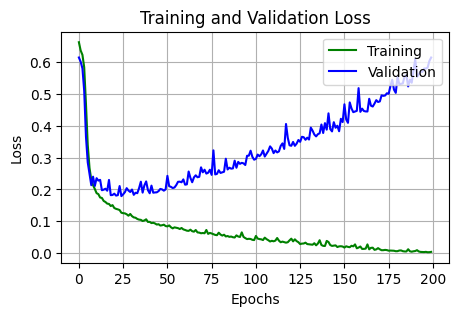

Final Training Loss:   0.004086
Final Validation Loss: 0.613812


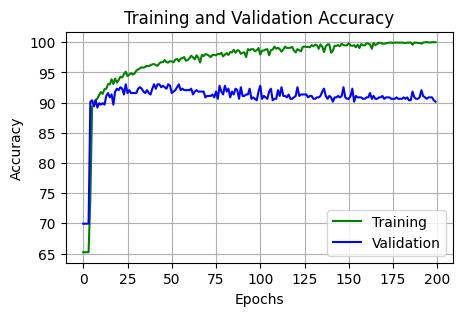

Final Training Accuracy:   100.0
Final Validation Accuracy: 90.144231



In [82]:
show_performance_curves(train_loss_list,val_loss_list,train_accuracy_list,val_accuracy_list)

In [78]:
import matplotlib.pyplot as plt

In [80]:
import numpy as np